# Data Bootcamp Final Project: Gender Wage Gap in the US
<br>
<br>





<div class="inline-block"> <img src="http://www.inforum.com/sites/default/files/styles/16x9_620/public/field/image/1280x720_60412B00-OGFXY.png?itok=KkEx9py9" style="width: 300px;"/> </div> 

**Ayesha Huq**

**[aah525@stern.nyu.edu](aah525@stern.nyu.edu)**

## Introduction

According to [Center for American Progess](https://www.americanprogress.org/issues/women/reports/2015/04/14/110962/women-of-color-and-the-gender-wage-gap/), on an average women earned 78% of what men earned in 2013 across all ethnicities. To this day we know that women earn significantly less for doing the same work. 

The [Pew Research Center Article ](http://www.pewresearch.org/fact-tank/2017/04/03/gender-pay-gap-facts/): *The narrowing, but persistent, gender gap in pay, Anna Brown and Eileen Patten, April 3, 2017* , mentions:
"The Census Bureau found that women earned 80% of what their male counterparts earned in 2015 when looking at full-time, year-round workers only"

It is really fascinating to analyze what causes this inequality in pay and how many dimentions it can be looked at.

I will disgnose this issue of gender wage gap in the following ways:

1. I will explain all the packages I have used in this project
2. I will find gender wage gap in different US states and analyze difference in median wages by industries across some states. 
3. I will analyze the correlation between educational attainment and gender wage gap
4. Will go into Gender wage gap in USA as a whole and look into:
    a. Industry
    b. Marital Status
    c. Race
5. I will conclude with a comparison of gender wage gaps across OECD Countries


## Packages

I have not used all the packages I have imported. Some I had imported just incase I wanted to experiment with some data. I have imported the following packages:
1. `display` : To display things 
2. `pandas` : To handle data and create tables of data which I can then plot on scatterplots, bar charts and so on
3. `matplotlib.pyplot` : To help with plotting the data on different figures such as bar charts
4. `numpy` : In case I need to perform math to manupulate the DataFrame
5. `statsmodels.api` : To do regression
6. `statsmodels.formula.api` : To do regression
7. `Basemap` : For mapping data 
8. `Census` : State data about Median wage, educational attainment, wage by education, wage by industry etc. 
9. `us_states` : for plotting median wage on appropriate state on the map
10. `output_notebook` : Allows to plot on Jupyter Notebook
11. `bokeh.plotting-show, figure, output_file, curdoc,ColumnDataSource` : Generate plots
12. `bokeh.models- ColumnDataSource, HoverTool,LogColorMapper,LogTicker,ColorBar,LinearColorMapper,Label`: For mapping wage gaps and making map interactive
13. `bokeh.palettes-brewer` : For map colors
14. `YouTubeVideo ` : To display youtube video

Might have to open notebook in this way:
jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

In [777]:
from IPython.display import display, Image 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf


from mpl_toolkits.basemap import Basemap as Basemap

from census import Census 
from us import states


from bokeh.io import output_notebook 
from bokeh.plotting import show, figure, output_file, curdoc,ColumnDataSource 
from bokeh.models import (
     ColumnDataSource,   # not sure
     HoverTool,          # can generate teh "hover too"
     LogColorMapper,
     LogTicker,
     ColorBar,
     LinearColorMapper,
     Label) # Googled how to put color bar in map and put ColorBar

%matplotlib inline  
output_notebook()




Loading BokehJS ...

In [778]:
from bokeh.sampledata import us_states

us_states = us_states.data.copy()


del us_states["HI"] # Following Mike Waugh's way to make graphing simpler
del us_states["AK"]

state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]
# For the right state shapes 

state_names = [us_states[code]["name"] for code in us_states]

In [779]:
us_states.keys()

dict_keys(['NV', 'AZ', 'WI', 'GA', 'KS', 'CT', 'IN', 'ME', 'MA', 'MT', 'MD', 'AR', 'AL', 'VA', 'NE', 'KY', 'NY', 'CO', 'VT', 'SD', 'MI', 'MO', 'NC', 'RI', 'ID', 'DE', 'DC', 'NH', 'MN', 'ND', 'OK', 'IA', 'TN', 'FL', 'LA', 'NM', 'WY', 'PA', 'SC', 'UT', 'WV', 'WA', 'MS', 'OR', 'IL', 'NJ', 'CA', 'OH', 'TX'])

In [781]:
#To see coordinates of the use states
#us_states

## Wage Gap across states

- **Data** :  [US Census Data](https://api.census.gov/data/2015/acs/acs5/variables.html)
All the US Cencus data are for 2015 and in 2015 Dollars.
- **inspiration** : Followed the way Prof Mike Waugh did his Bokeh plot of the US states (https://github.com/mwaugh0328/Data_Bootcamp_Fall_2017/blob/master/data_bootcamp_1120/more_mapping.ipynb)

**Explaination:** For each states, got total median wages, median wages for women: total and fulltime, median wages for men: total and fulltime.


Then I found the wage gap in total median wages between male and female and also for full time. Learned how to calculate wage gap from : (http://www.gnb.ca/0012/womens-issues/wg-es/tools/pdf/wg_calc-e.pdf). Calculated the difference between 100% and the median female wage as a percentage of median male wage. Thus finding the distance. 

First I created a map showing total median wage gap between men and women in each states. To be careful of fulltime data and how that might differ, I did the same with Full-time median wage gap between men and women and plotted another map. 

The lighter a region, for example Utah is yellow, the higher the wage gap. The Darker the region, for example Florida, the lower the wage gap.

In [782]:
my_api_key = '34e40301bda77077e24c859c6c6c0b721ad73fc7'
# This is Mike Waugh's API Key that I used

c = Census(my_api_key)


In [784]:
code = ("NAME","B20017_001E","B20017_002E","B20017_005E","B20017_003E","B20017_006E")

Median_wages_2015 = c.acs5.get(code, {'for': 'state:* '}, year=2015)

Median_wages_2015 = pd.DataFrame(Median_wages_2015)
Median_wages_2015= Median_wages_2015.rename(columns = {"B20017_001E":"Median_Wage", 
                                                       "B20017_002E":"MW_Men",
                                                       "B20017_005E": "MW_Women",
                                                        "NAME":"State_Name", "B20017_003E": "MW_Men_Fulltime",
                                                       "B20017_006E": "MW_Women_Fulltime"})
#Renaming columns so that we know what is what
Median_wages_2015=Median_wages_2015.drop(39) # Dropping Puerto Rico or else causes skewness
Median_wages_2015.head()

,Median_Wage,MW_Men,MW_Men_Fulltime,MW_Women,MW_Women_Fulltime,State_Name,state
0,36157.0,42375.0,57112.0,30525.0,44078.0,Alaska,02
1,27353.0,33442.0,45116.0,22207.0,33113.0,Alabama,01
2,26382.0,31043.0,40479.0,22033.0,31575.0,Arkansas,05
3,29627.0,32492.0,45090.0,25548.0,37264.0,Arizona,04
4,31296.0,35865.0,50885.0,26608.0,43491.0,California,06


In [789]:
Median_wages_2015["Wage_gap"]= \
100-100*Median_wages_2015["MW_Women"]/Median_wages_2015["MW_Men"]
#finding median wage gap= 100 minus women's earnings as a percentage of men's earnings

Median_wages_2015["Wage_gap_Fulltime"]=\
100-100*Median_wages_2015["MW_Women_Fulltime"]/Median_wages_2015["MW_Men_Fulltime"]
#same way


#YOu can make sure they are float types so that I can perform calculations one them
#Median_wages_2015["Wage_gap"] = Median_wages_2015["Wage_gap"].astype(float)
#Median_wages_2015["Wage_gap_Fulltime"] = Median_wages_2015["Wage_gap_Fulltime"].astype(float)

Median_wages_2015.head()

,Median_Wage,MW_Men,MW_Men_Fulltime,MW_Women,MW_Women_Fulltime,State_Name,state,Wage_gap,Wage_gap_Fulltime
0,36157.0,42375.0,57112.0,30525.0,44078.0,Alaska,02,27.964602,22.821824
1,27353.0,33442.0,45116.0,22207.0,33113.0,Alabama,01,33.595479,26.604752
2,26382.0,31043.0,40479.0,22033.0,31575.0,Arkansas,05,29.024257,21.996591
3,29627.0,32492.0,45090.0,25548.0,37264.0,Arizona,04,21.371415,17.356398
4,31296.0,35865.0,50885.0,26608.0,43491.0,California,06,25.810679,14.530805


In [790]:
# Creating new DataFrame so the order od states for median wage and mapping are the same

Median_Wages_new= pd.DataFrame()

for name in us_states.values():
    #print(name["name"])
    Median_Wages_new = \
    Median_Wages_new.append(Median_wages_2015[Median_wages_2015["State_Name"] \
    == str(name["name"])])

Median_Wages_new.head()

,Median_Wage,MW_Men,MW_Men_Fulltime,MW_Women,MW_Women_Fulltime,State_Name,state,Wage_gap,Wage_gap_Fulltime
33,30393.0,33040.0,44052.0,26584.0,36510.0,Nevada,32,19.539952,17.120676
3,29627.0,32492.0,45090.0,25548.0,37264.0,Arizona,04,21.371415,17.356398
49,30721.0,36707.0,48321.0,25292.0,37804.0,Wisconsin,55,31.097611,21.764864
10,29656.0,33740.0,45201.0,25047.0,36535.0,Georgia,13,25.764671,19.172142
16,30177.0,36022.0,46622.0,24027.0,35830.0,Kansas,20,33.299095,23.147870


In [791]:
from bokeh.palettes import brewer as palette


state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]
#Locations


color_mapper = LogColorMapper(palette=palette['YlGnBu'][6])
#Color

source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    rate = Median_Wages_new.Wage_gap.astype(float),
    name = Median_Wages_new.State_Name))
#Getting data for plotting


TOOLS = "pan,wheel_zoom,reset,hover,save"
#interactive map

p = figure(title="Median Wage Gap By State", toolbar_location="left",
           plot_width=900, plot_height=600, tools = TOOLS)


p.patches("x", "y", source = source, fill_alpha=0.7,
          fill_color={'field': 'rate', 'transform': color_mapper}, # Fill color
          line_color="#884444", line_width=2, 
         )
#Editing looks of the map


hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("%Wage Gap", "@rate"),]
#For Hover Tool 

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                 label_standoff=12, border_line_color=None, location=(0,0))

#For Color Bar on the side        
        
p.add_layout(color_bar, 'right')
#Color Bar location 

In [792]:
show(p) #Display

It can be seen that some of the highest wage gaps are in Utah, North Dakota, Wyoming, Idaho and Louisiana while Nevada and Florida have lower wage gaps at around 20%. New York and California are in the 24-26% range, which seems to be a lot considering how progressive the cultures in the cities of these states are and how big of a job market they represent. It is also worth noting that states with similar wage gaps, and thus similar colors are physicially lumped together. the southeast region seems to have darker colors and the northwest region seems to be lighter. 

## Median Wage Gap Fulltime

- **Data** :  [US Census Data](https://api.census.gov/data/2015/acs/acs5/variables.html)
All the US Cencus data are for 2015 and in 2015 Dollars.
- **Inspiration** : Followed the way Prof Mike Waugh did his Bokeh plot of the US states (https://github.com/mwaugh0328/Data_Bootcamp_Fall_2017/blob/master/data_bootcamp_1120/more_mapping.ipynb)

**Explaination:** Now I plotted median wage gap between men and women who work fulltime in each state. Although all the states have darker colors as a whole, the comparitive lightness and darkness had no dignificant change. 


In [793]:
from bokeh.palettes import brewer as palette


state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]


color_mapper = LogColorMapper(palette=palette['YlGnBu'][6])

source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    rate = Median_Wages_new.Wage_gap_Fulltime.astype(float),
    name = Median_Wages_new.State_Name))

TOOLS = "pan,wheel_zoom,reset,hover,save"
  
p2 = figure(title="Median Fulltime Wage Gap By State", toolbar_location="left",
           plot_width=900, plot_height=600, tools = TOOLS)

p2.patches("x", "y", source = source, fill_alpha=0.7,
          fill_color={'field': 'rate', 'transform': color_mapper}, # Fill color
          line_color="#884444", line_width=2, )

hover = p2.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("%Wage Gap", "@rate"),]

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                 label_standoff=12, border_line_color=None, location=(0,0))
         
p2.add_layout(color_bar, 'right')


In [794]:
show(p2)

With the wage gap plot for fulltime, it can be seen that some states such as Louisiana, Wyoming, Utah and North Dakota still have the highest wage gaps. However we can see that as a whole the wage gap decreased. New York and California seem to have gotten much darker relative to the last map. This might be signallign that more women tend to work part-time that men. Thus the median wage for total workforce would be less for women than for men. This can be specially the case in States that got significantly darker in this map such as New York, California and Colorado. For states such as West Virginia however, the wage gap seems to have increases with only full-time wages plotted. 

### Correlation with Educational attainment 

- **Data** :  [US Census Data](https://api.census.gov/data/2015/acs/acs5/variables.html)
All the US Cencus data are for 2015 and in 2015 Dollars.

-**Help with explanation** : [*Women can’t educate their way out of the gender wage gap Economic Snapshot,By Elise Gould and Teresa Kroeger,March 6, 2017*](http://www.epi.org/publication/women-cant-educate-their-way-out-of-the-gender-wage-gap/)

**Explaination:** For each states, I found the number of women and men with any educational attainment over 18yrs, number of women and men with bachelors degree 18-25 years and number of women and men with graduate or professional degree 25-34yrs. 
Then I found Median earnings for men and women with bachelor degrees and graduate/professional degree. 
I generated 3 scatterplots, treating each state like a point and made the size of the points proportional to the population of people with some at least educational attainment.

The 3 scatterplots are:
1. Median wag gap (used in the first map) against women as percentage of people who have any educational attainment 18yrs +
2. Median wage gap for Bachelors degree holders against women as percentage of people who have bachelors degrees
3. Median wage gap for Graduates/Professional degree holders against women as percentage of people who have Graduates/Professiona degrees

I analyzed the correlation and what I found was astounding and did not make sense untill I searched the internet and read a few articles 
 

## Getting Data on Number of Women and Finding Percentages

In [795]:
code = ("NAME","B15001_001E" , "B15001_002E", "B15001_043E", "B15001_009E", "B15001_050E","B15001_018E","B15001_059E")

Ed_At = c.acs5.get(code, {'for': 'state:* '}, year=2015)

Ed_At = pd.DataFrame(Ed_At)
#Educational attainment 
Ed_At= Ed_At.rename(columns = {"B15001_001E":"Ed_At_Pop", "B15001_002E":"Men",
                               "B15001_043E": "Women", "B15001_009E":"Men_Bachelors",
                               "B15001_050E": "Women_Bachelors", "NAME": "State_Name",
                               "B15001_018E": "Men_Grad", "B15001_059E": "Women_Grad"})

Ed_At["Percentage_Women"]=100*Ed_At["Women"]/Ed_At["Ed_At_Pop"] 
#women aspercentage of people with any educational attainment
Ed_At["Percentage_Women_B"]=100*Ed_At["Women_Bachelors"]/(Ed_At["Women_Bachelors"]+Ed_At["Men_Bachelors"])
#women as percentage of people with Bachelors degrees (18-25yrs)
Ed_At["Percentage_Women_G"]=100*Ed_At["Women_Grad"]/(Ed_At["Women_Grad"]+Ed_At["Men_Grad"])
#women as percentage of people with Graduate/ profesional degrees (25-34yrs)Ed_At=Ed_At.drop(39) #dropped puerto rico
Ed_At.head()

,Ed_At_Pop,Men,Men_Bachelors,Men_Grad,Women,Women_Bachelors,Women_Grad,State_Name,state,Percentage_Women,Percentage_Women_B,Percentage_Women_G
0,545248.0,287259.0,1806.0,2800.0,257989.0,2805.0,4171.0,Alaska,02,47.315900,60.832791,59.833596
1,3718646.0,1773950.0,13241.0,18237.0,1944696.0,19600.0,27885.0,Alabama,01,52.295809,59.681496,60.459217
2,2250387.0,1089826.0,7801.0,10211.0,1160561.0,11296.0,15902.0,Arkansas,05,51.571619,59.150652,60.896871
3,5024639.0,2473872.0,18557.0,28706.0,2550767.0,25259.0,36713.0,Arizona,04,50.765179,57.647891,56.119782
4,29247121.0,14399409.0,142655.0,230594.0,14847712.0,198496.0,296145.0,California,06,50.766405,58.184206,56.222342


## Getting Data on Median Wages by Educational Attainment

In [796]:
code = ("NAME","B20004_011E" , "B20004_012E", "B20004_017E", "B20004_018E")
Wage_Ed_At = c.acs5.get(code, {'for': 'state:* '}, year=2015)

Wage_Ed_At = pd.DataFrame(Wage_Ed_At)
#Median Wage by educational attainment

Wage_Ed_At= Wage_Ed_At.rename(columns = {"B20004_011E":"MW_Male_Bach", "B20004_012E":"MW_Male_Grad",
                               "B20004_017E": "MW_Female_Bach", "B20004_018E":"MW_Female_Grad",
                                "NAME": "State_Name"})

Wage_Ed_At["Wage_Gap_Bach"]= 100-100*Wage_Ed_At["MW_Female_Bach"]/Wage_Ed_At["MW_Male_Bach"]
Wage_Ed_At["Wage_Gap_Grad"]= 100-100*Wage_Ed_At["MW_Female_Grad"]/Wage_Ed_At["MW_Male_Grad"]

Wage_Ed_At=Wage_Ed_At.drop(39) #dropped puerto rico
Wage_Ed_At.head()

,MW_Male_Bach,MW_Male_Grad,MW_Female_Bach,MW_Female_Grad,State_Name,state,Wage_Gap_Bach,Wage_Gap_Grad
0,65899.0,80931.0,44085.0,63776.0,Alaska,02,33.102172,21.197069
1,60110.0,76615.0,38347.0,50180.0,Alabama,01,36.205290,34.503687
2,52999.0,71098.0,38077.0,49754.0,Arkansas,05,28.155248,30.020535
3,58831.0,77427.0,40306.0,50232.0,Arizona,04,31.488501,35.123407
4,66455.0,97219.0,47921.0,65673.0,California,06,27.889549,32.448390


## Combinign DataFrames for plotting

In [414]:
df_one = pd.DataFrame(Median_wages_2015)
df_two = pd.DataFrame(Ed_At)


combo = pd.merge(df_one, df_two,   # merging two dataframes to make a new one, easier for plotting
                 how='left',      
                 on='State_Name',       
                 indicator=True)  

combo= combo.drop(["Median_Wage","MW_Men","MW_Women","Men_Bachelors","Men_Grad", 
                  "Women_Bachelors","Women_Grad","Men","Women"], axis=1) 
#dropping irrelevant columns 

combo.head()

,State_Name,state_x,Wage_gap,Ed_At_Pop,state_y,Percentage_Women,Percentage_Women_B,Percentage_Women_G,_merge
0,Alaska,02,27.964602,545248.0,02,47.315900,60.832791,59.833596,both
1,Alabama,01,33.595479,3718646.0,01,52.295809,59.681496,60.459217,both
2,Arkansas,05,29.024257,2250387.0,05,51.571619,59.150652,60.896871,both
3,Arizona,04,21.371415,5024639.0,04,50.765179,57.647891,56.119782,both
4,California,06,25.810679,29247121.0,06,50.766405,58.184206,56.222342,both


## Plot 1

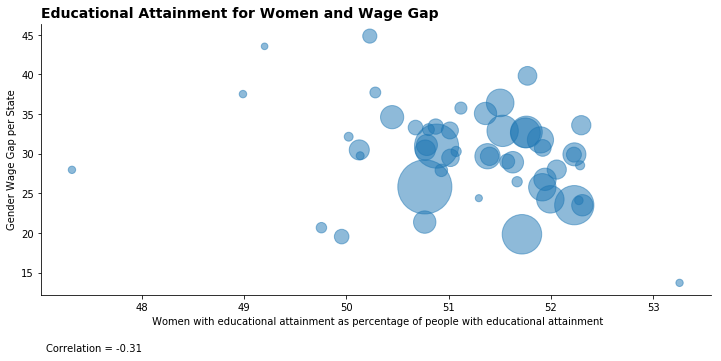

In [801]:
fig, ax = plt.subplots(figsize=(12,5)) 

ax.scatter((combo["Percentage_Women"]), (combo["Wage_gap"]), 
            s=combo["Ed_At_Pop"]/10**4, # making the size of the dotes equal to number of people with educational attainment in each state
            alpha= 0.50) 
#Plotting gender median wage gap against women as percentage of people with educational attainment

ax.set_title('Educational Attainment for Women and Wage Gap ', loc='left', fontsize=14, fontweight = "bold") 
# We know this, but note the new option, it specifies the location....

ax.set_xlabel(" Women with educational attainment as percentage of people with educational attainment")
ax.set_ylabel("Gender Wage Gap per State")


ax.spines["right"].set_visible(False) # removes lines on the right and top
ax.spines["top"].set_visible(False) 


corr_mat = combo.corr() # Gives us a number for correlation
cr = corr_mat.Percentage_Women.Wage_gap

message = "Correlation = " + str(round(cr,2)) 

ax.text(48,5, message, horizontalalignment='right')

plt.show()

There seems to be a very weak negative correlation between the educational attainment of women and gender wage gap. It can be seen that in most states, at least 50-53% of the educated population are women but they still tend to get paid less than men. In order to get clearer perspective, I generated the follwing two scatterplots for bachelors degree holders and Graduate/Professional degree holders.

## Merging Educational Attainment and Wage Gaps for new plots

In [419]:
df_three = pd.DataFrame(Wage_Ed_At)
df_four = pd.DataFrame(Ed_At)


combo2 = pd.merge(df_three, df_four,   
                 how='left',      
                 on='State_Name',       
                 indicator=True)  

combo2= combo2.drop(["MW_Male_Bach","MW_Male_Grad","MW_Female_Bach","MW_Female_Grad","Men", 
                  "Women","Men_Bachelors","Men_Grad", "Women_Bachelors","Women_Grad","Percentage_Women"], axis=1) #dropping irrelevant columns 

combo2.head()

,State_Name,state_x,Wage_Gap_Bach,Wage_Gap_Grad,Ed_At_Pop,state_y,Percentage_Women_B,Percentage_Women_G,_merge
0,Alaska,02,33.102172,21.197069,545248.0,02,60.832791,59.833596,both
1,Alabama,01,36.205290,34.503687,3718646.0,01,59.681496,60.459217,both
2,Arkansas,05,28.155248,30.020535,2250387.0,05,59.150652,60.896871,both
3,Arizona,04,31.488501,35.123407,5024639.0,04,57.647891,56.119782,both
4,California,06,27.889549,32.448390,29247121.0,06,58.184206,56.222342,both


## Plot 2

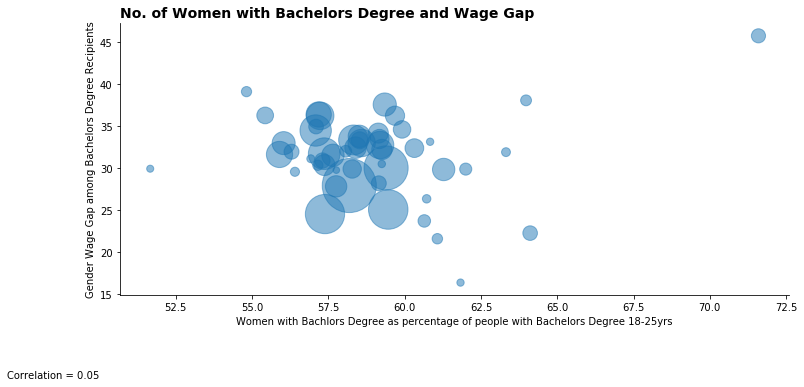

In [798]:
fig, ax = plt.subplots(figsize=(12,5)) 

ax.scatter((combo2["Percentage_Women_B"]), (combo2["Wage_Gap_Bach"]),
            s=combo2["Ed_At_Pop"]/10**4, 
            alpha= 0.50) 


ax.set_title('No. of Women with Bachelors Degree and Wage Gap ', loc='left', fontsize=14, fontweight = "bold") 
ax.set_xlabel("Women with Bachlors Degree as percentage of people with Bachelors Degree 18-25yrs")
ax.set_ylabel("Gender Wage Gap among Bachelors Degree Recipients")


ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

corr_mat = combo2.corr()
cr = corr_mat.Percentage_Women_B.Wage_Gap_Bach

message = "Correlation = " + str(round(cr,2)) 

ax.text(50, 5, message, horizontalalignment='right')

plt.show()



It seems that even in states with more women earning bachelors degrees than men, (55-63%) The median wage gap for Bachelors degree holders is still above 25%. So far  women's education does not seems to have a strong correlation with their pay. Thus the next plot is for women with Graduate/Professional degrees. 

## Plot 3

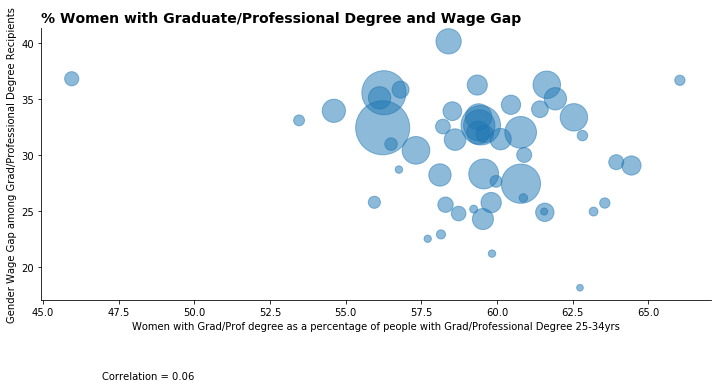

In [802]:
fig, ax = plt.subplots(figsize=(12,5))
ax.scatter((combo2["Percentage_Women_G"]), (combo2["Wage_Gap_Grad"]),
            s=combo2["Ed_At_Pop"]/10**4, 
            alpha= 0.50)
ax.set_title('% Women with Graduate/Professional Degree and Wage Gap ', loc='left', fontsize=14, fontweight = "bold") 


ax.set_xlabel("Women with Grad/Prof degree as a percentage of people with Grad/Professional Degree 25-34yrs")
ax.set_ylabel("Gender Wage Gap among Grad/Professional Degree Recipients")


ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

corr_mat = combo2.corr() 
cr = corr_mat.Percentage_Women_B.Wage_Gap_Grad

message = "Correlation = " + str(round(cr,2)) 

ax.text(50, 10, message, horizontalalignment='right')

plt.show()

Even as more women get Graduate degrees, it seems to have very little effect on the wage gap for Graduate degree holders. I found this very surprising until I read the article [*Women can’t educate their way out of the gender wage gap Economic Snapshot,By Elise Gould and Teresa Kroeger,March 6, 2017*](http://www.epi.org/publication/women-cant-educate-their-way-out-of-the-gender-wage-gap/). It mentions: "Women in the workforce have increased their educational attainment, yet women’s pay lags men’s at every level of education." 
Thus we can see that although women are leading in terms of educating themselves and preparing themselves for the workforce, it's still not enough for them as they continue to get paid less than their male counterparts.

## Median Wages by Industry

- **Data** :  [US Census Data](https://api.census.gov/data/2015/acs/acs5/variables.html)
All the US Cencus data are for 2015 and in 2015 Dollars.

**Explaination** : I picked a few states to represent different wage gap levels. I chose Utah and North Dakota for high level of wage gap,and then California, New York, nevada and Florida for medium to low level of wage gap. 

For these states, I picked median wages for men and women by industry from US Census Data and tried to analyze the differences and see if it explains anything. The industries are : Agriculture, Information, Finance, Entertainment and Healthcare.

## Generating DataFrame for Median Wages by Gender and Industry

In [803]:
my_api_key = '34e40301bda77077e24c859c6c6c0b721ad73fc7'

c = Census(my_api_key)

code = ("NAME","B24032_004E","B24032_031E","B24032_012E","B24032_039E","B24032_014E",
        "B24032_041E","B24032_025E","B24032_052E","B24032_022E","B24032_049E")

WageGap_Industry = c.acs5.get(code, {'for': 'state: 06,38,32,36,49,12' }, year=2015)

WageGap_Industry= pd.DataFrame(WageGap_Industry)

WageGap_Industry= WageGap_Industry.rename(columns = {"B24032_004E":"Male_Agriculture_Fishing_Mining",
                                                     "B24032_031E":"Female_Agriculture_Fishing_Mining",
                                                     "B24032_012E":"Male_Information", 
                                                     "B24032_039E":"Female_Information",
                                                     "B24032_014E":"Male_Finance_Insurance",
                                                     "B24032_041E": "Female_Finance_Insurance",
                                                     "B24032_025E":"Male_Entertainment",
                                                     "B24032_052E":"Female_Entertainment",
                                                     "B24032_022E":"Male_Healthcare",
                                                     "B24032_049E":"Female_Healthcare",
                                                     "NAME": "State_Name"})

WageGap_Industry = WageGap_Industry.set_index(['State_Name'])
#Set index to State names

Agriculture = WageGap_Industry[["Male_Agriculture_Fishing_Mining","Female_Agriculture_Fishing_Mining"]]
Information = WageGap_Industry[["Male_Information","Female_Information"]]
Finance_Insurance= WageGap_Industry[["Male_Finance_Insurance","Female_Finance_Insurance"]]
Entertainment = WageGap_Industry[["Male_Entertainment","Female_Entertainment"]]
Healthcare = WageGap_Industry[["Male_Healthcare","Female_Healthcare"]]
#Making new mini Dataframes so that plotting is easier

WageGap_Industry

,Male_Agriculture_Fishing_Mining,Male_Information,Male_Finance_Insurance,Male_Healthcare,Male_Entertainment,Female_Agriculture_Fishing_Mining,Female_Information,Female_Finance_Insurance,Female_Healthcare,Female_Entertainment,state
State_Name,,,,,,,,,,,
California,63877.0,66859.0,73905.0,48731.0,18976.0,60977.0,51210.0,46989.0,34244.0,14547.0,06
Florida,56175.0,48282.0,57860.0,44966.0,19107.0,54782.0,34197.0,39973.0,30896.0,15112.0,12
North Dakota,76811.0,45247.0,60108.0,42389.0,16303.0,41454.0,28304.0,33767.0,28911.0,11753.0,38
Nevada,75595.0,46782.0,52922.0,47229.0,29329.0,55461.0,35084.0,36645.0,34438.0,24863.0,32
New York,50652.0,64500.0,99067.0,46898.0,20306.0,36798.0,51093.0,52032.0,33515.0,14731.0,36
Utah,67975.0,45381.0,58991.0,48595.0,13858.0,40512.0,23260.0,34791.0,25433.0,11494.0,49


## Agriculture

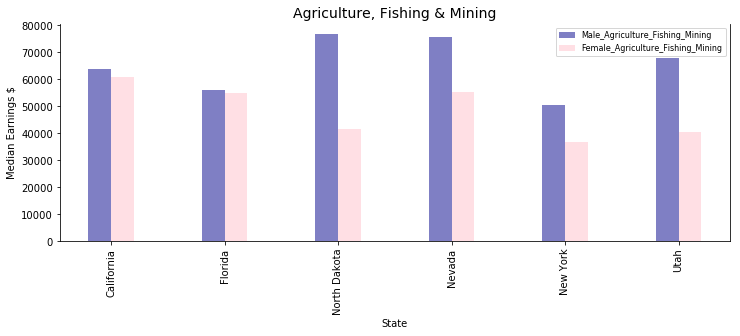

In [569]:
fig, ax = plt.subplots(figsize=(12,4))

Agriculture.plot(ax=ax, 
        kind='bar',                
        color=['darkblue', 'pink'],   #Color of bars
        alpha=0.5, width=0.4)

ax.set_ylabel('Median Earnings $')
ax.set_xlabel('State')
ax.set_ylim(0)
ax.set_title('Agriculture, Fishing & Mining', fontsize=14)
ax.legend(fontsize=8, 
             loc=0)
ax.spines["top"].set_visible(False)  

## Information 

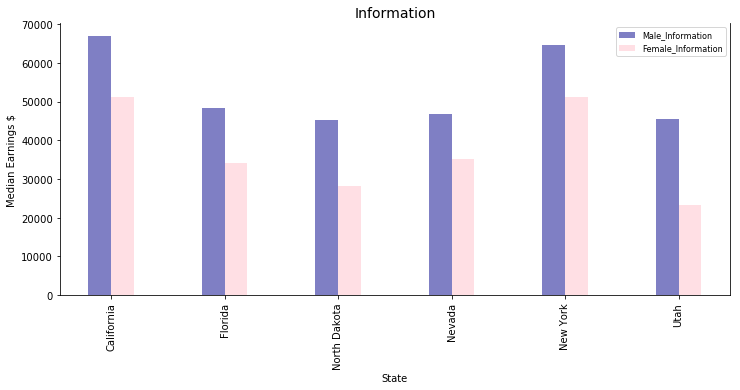

In [568]:
fig, ax = plt.subplots(figsize=(12,5))

Information.plot(ax=ax, 
        kind='bar',                
        color=['darkblue', 'pink'],   
        alpha=0.5, width=0.4)

ax.set_ylabel('Median Earnings $')
ax.set_xlabel('State')
ax.set_ylim(0)
ax.set_title('Information', fontsize=14)
ax.legend(fontsize=8, 
             loc=0)
ax.spines["top"].set_visible(False) 

## Finance

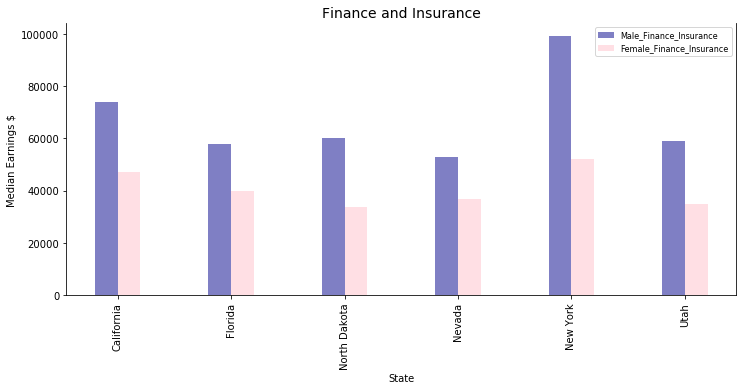

In [571]:
fig, ax = plt.subplots(figsize=(12,5))

Finance_Insurance.plot(ax=ax, 
        kind='bar',                 
        color=['darkblue', 'pink'],   
        alpha=0.5, width=0.4)

ax.set_ylabel('Median Earnings $')
ax.set_xlabel('State')
ax.set_ylim(0)
ax.set_title('Finance and Insurance', fontsize=14)
ax.legend(fontsize=8, 
             loc=0)
ax.spines["top"].set_visible(False) 

## Entertainment

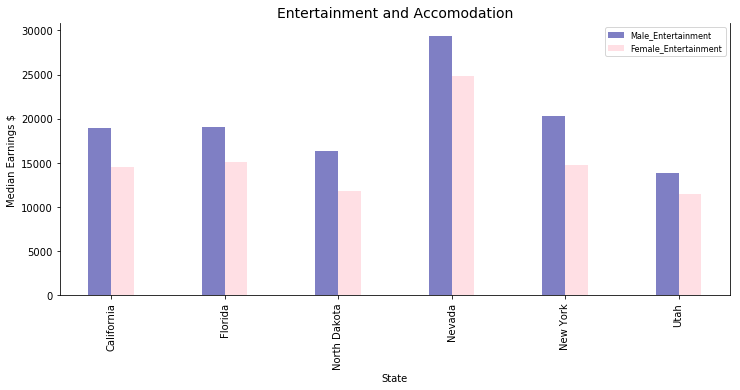

In [566]:
fig, ax = plt.subplots(figsize=(12,5))

Entertainment.plot(ax=ax, 
        kind='bar',                 
        color=['darkblue', 'pink'],   
        alpha=0.5, width=0.4)

ax.set_ylabel('Median Earnings $')
ax.set_xlabel('State')
ax.set_ylim(0)
ax.set_title('Entertainment and Accomodation', fontsize=14)
ax.legend(fontsize=8, 
             loc=0)
ax.spines["top"].set_visible(False) 

## Healthcare

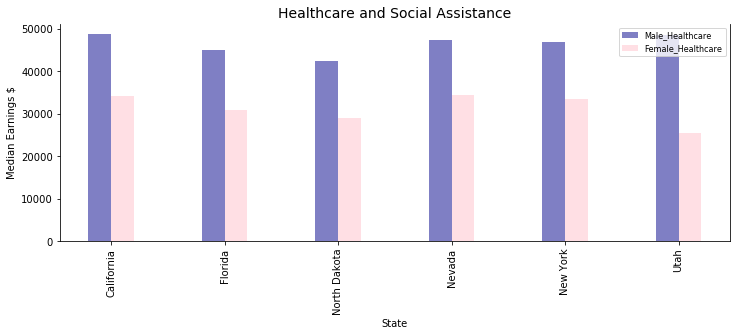

In [565]:
fig, ax = plt.subplots(figsize=(12,4))

Healthcare.plot(ax=ax, 
        kind='bar',                 
        color=['darkblue', 'pink'], 
        alpha=0.5, width=0.4)

ax.set_ylabel('Median Earnings $')
ax.set_xlabel('State')
ax.set_ylim(0)
ax.set_title('Healthcare and Social Assistance', fontsize=14)
ax.legend(fontsize=8, 
             loc=0)
ax.spines["top"].set_visible(False) 

Finance and Insurance industries seems to have a big gap between male and female median wages across these states. We can also see that New York, the kings of the finance Industry has a very significant difference between median wages for men and women. In utah and North Dakota however, there are significant gaps between male and female in almost all industries except entertainment. It might be that the really high wage gaps in States like New York or California for the tech or finance industries is lessedned by the relatively lower wage gaps in other industries. Whereas for Utah and North Dakota, they have consistant wage gaps in all industries. 

# Moving to a Broader View: the US
 Now  to analyze the wage gap in US in general, I have generated 3 bar charts showing relationship of median wages of men and women with:
 1. Occupation
 2. Marital Status
 3. Race
 
 **NOTE** When trying to pull the 3 datasets from the original excel or csv files From BLS and US Census, Following error messages kept coming up:
 
 -`UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 0: unexpected end of data`
 
 -`ParserError: Error tokenizing data. C error: Expected 1 fields in line 112, saw 2`


Thus I had to edit the excel sheets and use those to build the DataFrames. The original excel and csv versions are in the repository along with the edited one that I used in the 3 bar chart plots.

## Occupation 
- **Data** :  US Bureau of Labor Statistics Data - Original File: 

csv https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Wage_by_Occupation_BLS.csv

excel
https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Wage_by_Occupation_BLS.xlsx

edited csv(The one that I cleaned and used)
https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Wage_by_Occupation_BLS_Edited.csv

**Explaination** : I have the median wages for different occupation broken down by gender and used it to analyze wage gap in US as a whole for different occupations

In [673]:
url1="https://raw.githubusercontent.com/aah525/Data_Bootcamp_Final_Project/master/Wage_by_Occupation_BLS_Edited.csv"
WG_Occupation = pd.read_csv(url1)
#Median weekly earnings for men and women by occupation

WG_Occupation= WG_Occupation.dropna(axis=0, how="all") #dropping rows with NaN values
WG_Occupation= WG_Occupation.set_index(["Occupation"])
WG_Occupation= WG_Occupation.drop(["Total Number of workers","Total Median weekly earnings",
                                 "Number of workers Men", "Number of workers Women"], axis=1)
WG_Occupation.head()

,Median weekly earnings Men,Median weekly earnings Women
Occupation,,
"Management, business, and financial operations occupations",1491.0,1099.0
Business and financial operations occupations,1373.0,1018.0
Professional and related occupations,1364.0,998.0
Architecture and engineering occupations,1529.0,1207.0
"Life, physical, and social science occupations",1319.0,1119.0


## Plot Occupation and Median Wages

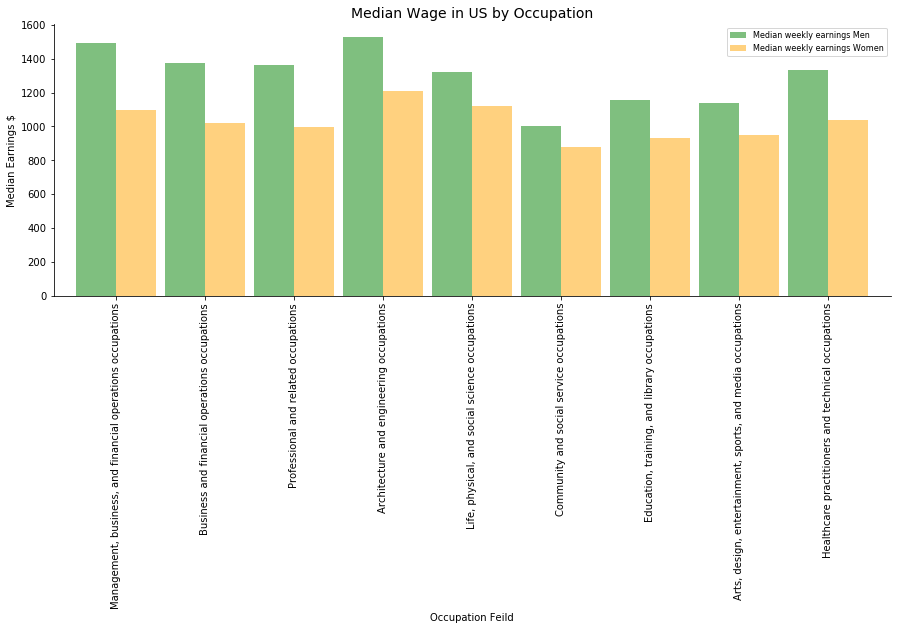

In [717]:
fig, ax = plt.subplots(figsize=(15,5))

WG_Occupation.plot(ax=ax, 
        kind='bar',                 
        color=['green', 'orange'],   
        alpha=0.5, width=0.9)

ax.set_ylabel('Median Earnings $')
ax.set_xlabel('Occupation Feild')
ax.set_ylim(0)
ax.set_title('Median Wage in US by Occupation', fontsize=14)
ax.legend(fontsize=8, 
             loc=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

Observing this bar chart, it seems that even across the US the Finance industry seems to have a high wage gap between men and women. On the other hand, Community and social service occupations seem to have a low gap in median wages between men and women. 
There are a few assumptions that we can make from this, one is that industries such as Finance view women as less capable for the tasks required in that industry and Social services industry might view women as equally capable. 

# Marital Status
- **Data** : [US Census Bureau](https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-people.html) Original File:

csv 
https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/MW_MaritalStatus.csv

excel 
https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Marital_Status.xls

edited csv (The one that I cleaned and used) 
https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Marital_Status_edited.csv

**Explaination** : I found Median earnings 2016 for Men and Women by their Marital Status and then plotted a Bar Chart to see what might explain the gender wage gap in terms of Marital Status,

In [718]:
url="https://raw.githubusercontent.com/aah525/Data_Bootcamp_Final_Project/master/Marital_Status_edited.csv"

Marital_Status = pd.read_csv(url)
#Median wage for men and women by marital status
Marital_Status=Marital_Status.set_index(["Marital Status"])
Marital_Status.head()

,Male,Female
Marital Status,,
"Single, Never Married",25860,22109
Married Total,50086,27075
"Married, Spouse Present",50795,27528
"Married, Spouse Absent",35348,21870
Widowed,26891,21264


## Plot Marital Status and Median Wages

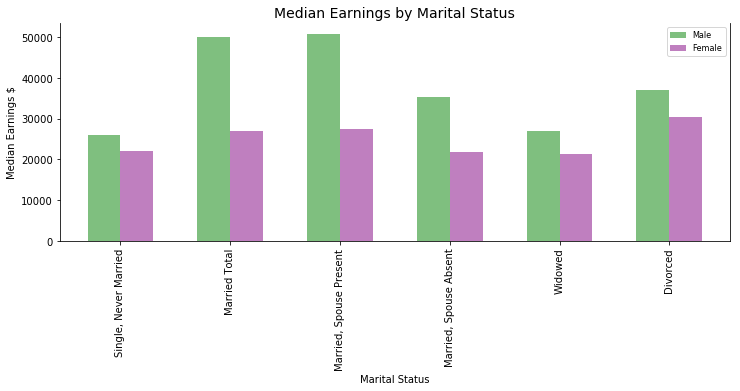

In [719]:
fig, ax = plt.subplots(figsize=(12,4))

Marital_Status.plot(ax=ax, 
        kind='bar',                 # line plot 
        color=['green', 'purple'],   # line color 
        alpha=0.5, width=0.6)

ax.set_ylabel('Median Earnings $')
ax.set_xlabel('Marital Status')
ax.set_ylim(0)
ax.set_title('Median Earnings by Marital Status', fontsize=14)
ax.legend(fontsize=8, 
             loc=0)
ax.spines["top"].set_visible(False) 

There is a relatively huge gap between median earnings of single men and women and median earnings of married men and women. Married women who's spouse are present seem to earn almost half as much as their male counterparts compared to married woman who's spouse are absent. while married women with absent spouses have lower median wages than the ones with spouses present, the wage gap is higher for married women with spouses present.

The reason might be that with the spouse absent, men and women have to take care of their children, if they have any. This might shift their focus from work and firms across industries are likely to value such employees less. However, even with the spouse absent men have higher median wages than women with their spouses present. 

It may be that employers think that women need to take care of both their husbands and their children but men only need to take care of their children when their spouse is absent. Thus we see a higher fall in Median earnings for married men if their spouse is not present. But for women, the fall might be lower because with the spouse gone, they only have to take care of children and not both the spouse and children.

Therefore from present to absent spouses, Married men's median earnings falls by more than Married women's median earnings. As a result the wage gap between the "spouse present" group is higher than the "spouse absent group"

## Race
- **Data** : US Bureau of Labor Statistics Data - Original File: 

csv https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Wage_by_Race_BLS.csv

excel
https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Wage_by_Race_BLS.xlsx

edited csv(The one that I cleaned and used)
https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Wage_by_Race_BLS_Edited.csv

**Explaination** : I have the weekly median wages for different races broken down by gender and used it to analyze wage gap in US as a whole for different races. We all know that racial discrimintion and biases still have influence in hiring and payment decisions. However I am takign a deeper dive into the wage gap issue and analysis the difference in wag gap between men and women of different race. In the following figure we can see how race plays a role in weekly median earnings of women and men

In [734]:
url2="https://raw.githubusercontent.com/aah525/Data_Bootcamp_Final_Project/master/Wage_by_Race_BLS_Edited.csv"
Wage_Race = pd.read_csv(url2)

#weekly median wage by Race

Wage_Race= Wage_Race.dropna(axis=0, how="all")
Wage_Race= Wage_Race.set_index(["Race "])
Wage_Race

,Male,Female
Race,,
White,942.0,766.0
Black,718.0,641.0
Asian,1151.0,902.0
Hispanic or Latino,663.0,586.0


## Plot Race and Weekly Median Wages

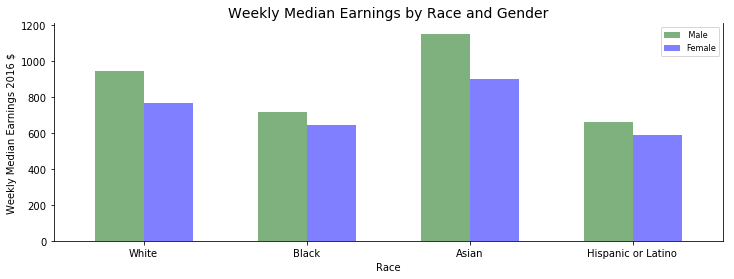

In [776]:
fig, ax = plt.subplots(figsize=(12,4))

Wage_Race.plot(ax=ax, 
        kind='bar',                 
        color=['darkgreen', 'blue'],   
        alpha=0.5, width=0.6, rot=0) 

#rot=0 makes the X axis labels horizontal. Found out from googling

ax.set_ylabel('Weekly Median Earnings 2016 $')
ax.set_xlabel('Race')
ax.set_ylim(0)
ax.set_title('Weekly Median Earnings by Race and Gender', fontsize=14)
ax.legend(fontsize=8, 
             loc=0)
ax.spines["top"].set_visible(False) 

While White and Asian women have higher weekly median earnings than Hispanic or Black women,they get significantly less than their male counterparts compared to Black and Hispanic women. It might be that White and Asian women tend to work in more male dominated fields such as Finance while Black and Hispanic women might work in a field which thinks of men and women as equally capable for the work.

## Wage Gap Across the World

- **Data** : [OECD data](https://data.oecd.org/earnwage/gender-wage-gap.htm) 

csv file: https://github.com/aah525/Data_Bootcamp_Final_Project/blob/master/Wage_gap_Countries.csv

- **Inspiration** : I got the idea to use OECD countries to compare wage gap from a past project [*by Gatiganti on Gender Wage Gap, Undergrad, Fall 2016*](https://github.com/NYUDataBootcamp/Projects/blob/master/UG_F16/Gatiganti%20-%20Gender%20Wage%20Gap.ipynb). I thought that these were a good selection of countries and I could use this data to compare wage gap across countries

I generated a bar shart to compare gender wage gap in US with other countries in 2015

In [749]:

url3="https://raw.githubusercontent.com/aah525/Data_Bootcamp_Final_Project/master/Wage_gap_Countries.csv"
WG_Countries = pd.read_csv(url3)
#Median Wage gap acrross OECD Countries 2015

WG_Countries= WG_Countries.drop(["INDICATOR","SUBJECT", "MEASURE","FREQUENCY", "TIME", "Flag Codes"], axis=1)
WG_Countries= WG_Countries.rename(columns = {"Value":"Wage_Gap","LOCATION": "Country"})
WG_Countries= WG_Countries.set_index(["Country"])
WG_Countries.head()

,Wage_Gap
Country,
AUS,13.000000
AUT,17.043253
CAN,18.627451
CZE,16.455154
DNK,5.836048


## Plot Gender Wage Gap of OECD Countries

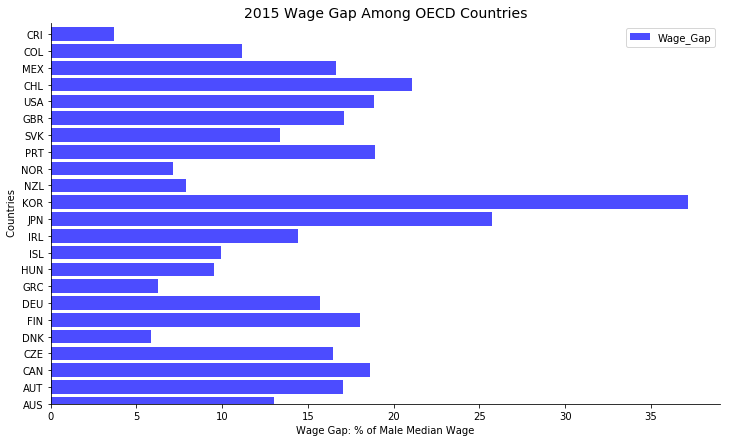

In [812]:
fig, ax = plt.subplots(figsize=(12,7))

WG_Countries.plot(ax=ax, 
        kind='barh',                
        color=['blue'],   
        alpha=0.7, width=0.8)

ax.set_ylabel(' Countries')
ax.set_xlabel('Wage Gap: % of Male Median Wage')
ax.set_ylim(0)
ax.set_title('2015 Wage Gap Among OECD Countries', fontsize=14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

The gender wage gap in USA is not as high as Korea's 37% but also not as low as Costa Rica's 3.7%. However the wage gap at 20% for the US is still high enough to cause worry amongst women. It would be interesting to see what factors cause such major differences in wage gaps across the world. However I fear that it might be partially rooted into unfair gender biases since we have seen how increasing educational attainment still fails to decrease the gender wage gap.

## What people miss about the gender wage gap - Vox

Learned how to display video by looking at past project by [*Nyamupachitu Sanchez on Female Unemployment SA , Undergrad, Summer 2016*](https://github.com/NYUDataBootcamp/Projects/blob/master/UG_S16/Nyamupachitu-Sanchez-FemaleUnemploymentSA.ipynb)

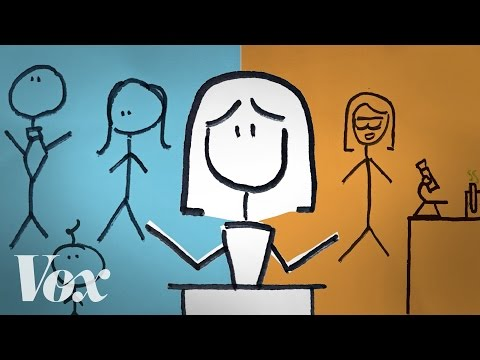

In [834]:
from IPython.display import YouTubeVideo 
YouTubeVideo("13XU4fMlN3w", width=700, height=500,)

## Conclusion

Through this project cannot pinpoint the exact reasons to why women earn about 80 cents for every dollar a man makes. However it does make clear that educational attainment alone cannot achieve equality in pay. Factors such as marital status, race and male-dominated indutries also play a big role in this issue. Furthermore there are also biases that most workplaces are structured around, whcih are hard to quantify and thus correlate with wage gaps. We also see that the inequality is not only betweenmen and women but also betwen women of differnt race and marital status.